In [2]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline
import matplotlib.pyplot as plt

/Users/ogando/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


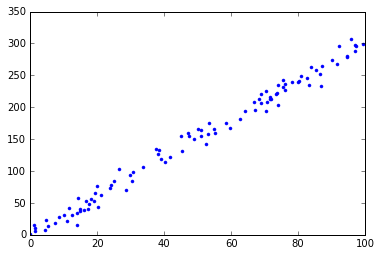

In [3]:
x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

In [4]:
def line(x, a, b):
    return a * x + b

In [5]:
def line2(x, a, b, c):
    return a*x*x + b*x + c

In [6]:
popt, pcov = curve_fit(line, x, y)

In [7]:
popt

array([ 3.01271862,  0.92093738])

In [8]:
pcov

array([[  1.19044936e-03,  -5.89528398e-02],
       [ -5.89528398e-02,   3.97934190e+00]])

In [9]:
popt2, pcov2 = curve_fit(line2, x, y)

In [10]:
popt2

array([ -1.31076612e-03,   3.14091590e+00,  -1.04605507e+00])

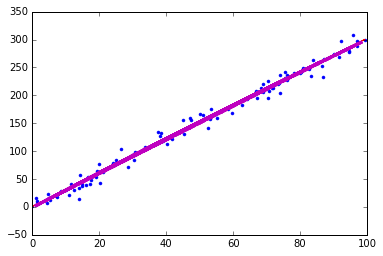

In [11]:
plt.plot(x, y, '.')
plt.plot(x, line(x, popt[0], popt[1]), 'r-')
plt.plot(x, line2(x, popt2[0], popt2[1], popt2[2]), 'm--', lw=3)

Now using Dexter http://dc.zah.uni-heidelberg.de/sdexter/lumfunc2/

Grabbed data from a luminosity function from
[Luminosity Function Constraints on the Evolution of Massive Red Galaxies Since z~0\.9 \- INSPIRE\-HEP](https://inspirehep.net/record/784565?ln=en)
https://inspirehep.net/record/784565/plots

<img src="https://inspirehep.net/record/784565/files/f14.png">

In [12]:
from astropy.table import Table

In [13]:
lf = Table.read('lumfunc2.1', format='ascii')
m, phi = lf['col1'].data, lf['col2'].data
m, phi

(array([-22.96, -22.84, -22.73, -22.64, -22.54, -22.43, -22.34, -22.24,
        -22.14, -22.04, -21.94, -21.85, -21.75, -21.64, -21.53]),
 array([  1.39900000e-06,   2.07700000e-06,   3.59300000e-06,
          6.03100000e-06,   8.95400000e-06,   1.69700000e-05,
          2.37100000e-05,   3.63000000e-05,   5.73100000e-05,
          8.50900000e-05,   1.11800000e-04,   1.51500000e-04,
          2.18200000e-04,   2.69600000e-04,   3.65200000e-04]))

(1e-06, 0.001)

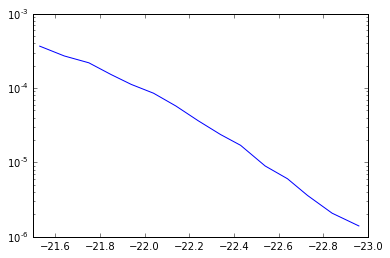

In [14]:
plt.semilogy(m, phi)
plt.xlim(-21.5, -23)
plt.ylim(1e-6, 1e-3)

In [16]:
def lumfunc(x, phis, alphas, M):
    return 0.4*np.log(10.)*phis*((10.**(0.4*(M-x)))**(alphas+1.))*(np.exp(-10.**(0.4*(M-x))))

Giving Initial Guess for parameters p0 is needed to get fit coefficients

In [23]:
p0 = [1.2e-2, -1.5, -20.5]
lfcoef, lfcov = curve_fit(lumfunc, m, phi, p0=p0)
print lfcoef

[  4.69272684e-03  -1.31359932e+00  -2.06615056e+01]


(1e-06, 0.001)

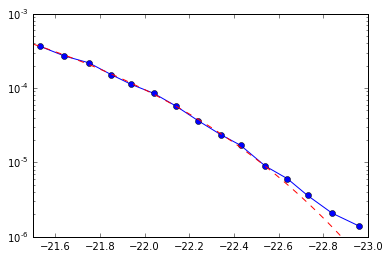

In [24]:
plt.semilogy(lf['col1'],lf['col2'], 'bo-')
mabs = np.linspace(-21.5, -23, 100)
#plt.semilogy(mabs, lumfunc(mabs, 1.2e-2, -1.5, -20.5))
plt.semilogy(mabs, lumfunc(mabs, lfcoef[0], lfcoef[1], lfcoef[2]), 'r--')

plt.xlim(-21.5, -23)
plt.ylim(1e-6, 1e-3)